<a href="https://colab.research.google.com/github/terrainthesky-hub/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/LS_DS_221_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [0]:
!pip install pandas-profiling==2.*

  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241339 sha256=2c293f88763abfe893826515c81d888edde3300696f8ce742e3fc3bfce3831b6
  Stored in directory: C:\Users\Lesley\AppData\Local\pip\Cache\wheels\9b\c9\f1\4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp37-none-any.whl size=17494 sha256=270d9286c48c075ee3b4b5242751e6b6c1081d781114cca20cbefe892387f091
  Stored in directory: C:\Users\Lesley\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Created wheel for visions: filename=visions-0.2.2-cp37-none-any.whl size=53062 sha256=81af59c92574418c76db2e718da3ba28f6d8766434d1e4ffdc8bc542b0ec06a4
  Stored in directory: C:\Users\Lesley\AppData\Local\pip\Cache\wheels\53\87\68\294a9e88d82e395b38571df18f7cb71e9ab51cedae77dd6f31
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=ed9b88eddc122c0ba994af385cdafa05edaa104c

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\lesley\\anaconda3\\lib\\site-packages\\~andas\\io\\msgpack\\_packer.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [0]:
!pip install category_encoders==2.*

In [0]:
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(r'C:\Users\Lesley\Downloads\train_features.csv'), pd.read_csv(r'C:\Users\Lesley\Downloads\train_labels.csv'))

test = pd.read_csv(r'C:\Users\Lesley\Downloads\test_features.csv')

train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape


((47520, 41), (11880, 41), (14358, 40))

In [0]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [0]:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [0]:
target = 'status_group'

train_features = train.drop(columns=[target, 'id'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features

In [0]:
X_train = train[features]
X_val = val[features]
X_test = test[features]
y_train = train[target]
y_val = val[target]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [0]:
pipeline = make_pipeline(
            ce.OneHotEncoder(use_cat_names=True),
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            DecisionTreeClassifier(random_state=42, min_samples_leaf=10))

pipeline.fit(X_train, y_train)

print('train accuracy', pipeline.score(X_train, y_train))
print('val accuracy', pipeline.score(X_val, y_val))

train accuracy 0.8376262626262626
val accuracy 0.7745791245791246


val accuracy 0.7745791245791246


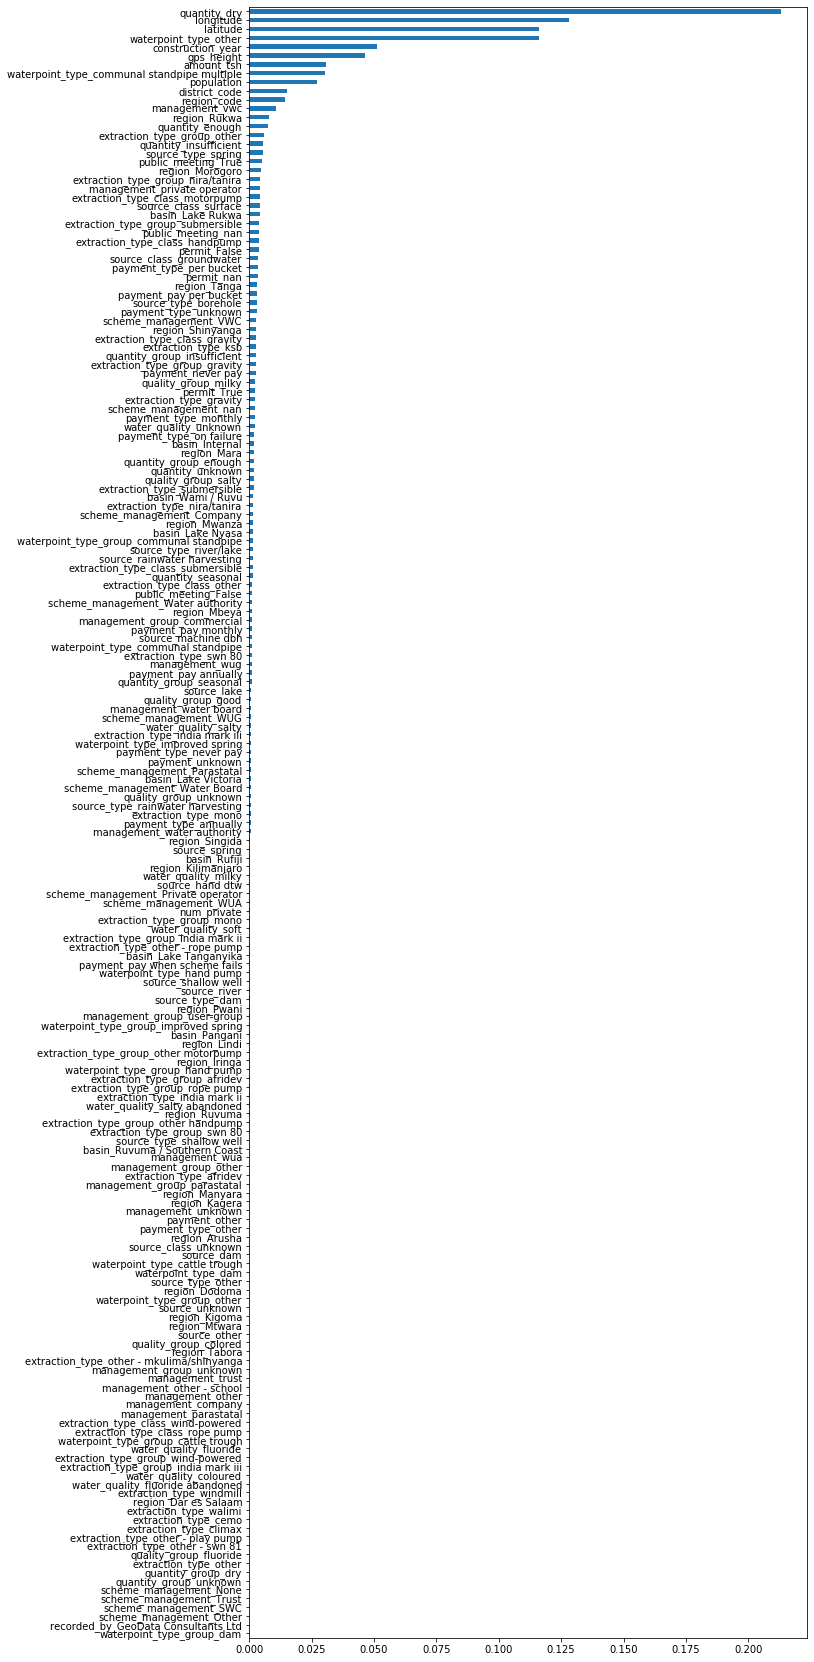

In [0]:
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']

encoder = pipeline.named_steps['onehotencoder']

encoded_columns = encoder.transform(X_val).columns
importances = pd.Series( model.feature_importances_, encoded_columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()
plt.show()

In [0]:
y_pred = pipeline.predict(X_test)

In [0]:
dtwp = pd.read_csv(r'C:\Users\Lesley\Downloads\test_features.csv')
submission = dtwp.copy()

path=r'C:\Users\Lesley\Desktop\Lambda\Lesley_Rich'

submission['status_group'] = y_pred

submission['status_group'].to_csv(path+'DecisionTreeWaterPumpSub.csv', index=False, header=True)

In [0]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
# submission['status_group']
submission.to_csv(path+'DecisionTreeWaterPumpSub.csv', index=False)

In [0]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)